In [1]:
import matplotlib.pyplot as plt

from stoneforge import data_replacement as dtr
from stoneforge.datasets import dataload

In [2]:
dataload.ik1()[0]

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT
0,81.0,-999.0,-999.0,-999.0,-999.0,79.7502,-999.0,-999.0,-999.0,-999.0,-999.0
1,81.5,-999.0,-999.0,-999.0,-999.0,79.9790,-999.0,-999.0,-999.0,-999.0,-999.0
2,82.0,-999.0,-999.0,-999.0,-999.0,79.8643,-999.0,-999.0,-999.0,-999.0,-999.0
3,82.5,-999.0,-999.0,-999.0,-999.0,79.9446,-999.0,-999.0,-999.0,-999.0,-999.0
4,83.0,-999.0,-999.0,-999.0,-999.0,80.1459,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...
30796,15479.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
30797,15479.5,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
30798,15480.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
30799,15480.5,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0


In [10]:
DATA = {
    "IK1":dataload.ik1()[0], # 10619 - 10842
    "ES1":dataload.es1()[0], # 7468 - 7528
    "DP1":dataload.dp1()[0] # 7572 - 7821
}

a = dtr.project(DATA,name = "data_replacement_alaska", project_path =".mlprj", remove_null = -999.0)

a.settings()

In [11]:
F_info = [
        {"well":"ES1",
         "depth":"DEPT",
         "range":{
             "top":7467,
             "bottom":7528
         },
         "X":["RHOB","NPHI"],
         "Y":["DT"]
        },
        {"well":"DP1",
         "depth":"DEPT",
         "range":{
             "top":7572,
             "bottom":7821
             },
         "X":["RHOB","NPHI"],
         "Y":["DT"]
        }
]

a.fit(F_info)

linear_regression_simple


In [12]:
P_info = [
    {"well":"IK1",
     "depth":"DEPT",
     "range":{
         "top":10619,
         "bottom":10842
         },
         "X":["RHOB","NPHI"],
         "Y":["DT"]
    }
]
a.predict(P_info, curve_name = "DT_c")

In [13]:
IK1 = a.return_data('IK1')
IK1

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT,DT_c
21076,10619.0,-92.3719,5.6534,7.5047,10.3189,32.1681,9.5756,2.4324,0.0280,18.5964,74.0643,73.365934
21077,10619.5,-92.6030,5.4512,7.1849,9.8774,29.9718,9.5682,2.4169,0.0243,18.5066,73.7811,73.633370
21078,10620.0,-92.8108,5.2563,6.9832,9.3140,28.8898,9.5609,2.4278,0.0214,18.2585,73.3278,73.395027
21079,10620.5,-93.0186,5.0684,6.7872,8.3432,28.8571,9.5536,2.4187,0.0232,18.0104,72.9256,73.520479
21080,10621.0,-93.2263,4.9828,6.7115,7.1612,29.6683,9.5463,2.3921,0.0221,17.8458,73.9007,73.977739
...,...,...,...,...,...,...,...,...,...,...,...,...
21518,10840.0,-84.3232,15.8031,24.9516,38.3127,38.1211,9.6802,2.5684,0.0246,9.2279,65.8097,69.378860
21519,10840.5,-83.6495,18.1204,25.9377,29.7650,36.1407,9.6372,2.5561,0.0323,8.8146,63.3392,69.535835
21520,10841.0,-82.9757,23.8513,37.9959,22.8938,36.0931,9.5941,2.5345,0.0364,8.6617,63.0884,69.904036
21521,10841.5,-82.3019,24.9165,54.6157,25.3613,37.6945,9.5790,2.5176,0.0275,8.5357,63.5907,70.191090


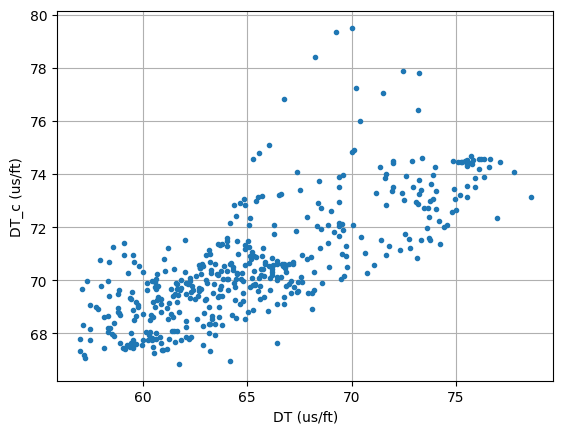

In [23]:
plt.plot(IK1.DT,IK1.DT_c,'.')
plt.xlabel("DT (us/ft)")
plt.ylabel("DT_c (us/ft)")
plt.grid()
plt.show()